# The Doggy Adventure
### miniproject part 1 - Meeting Keras

based on https://www.kaggle.com/msripooja/dog-images-classification-using-keras-alexnet

In [1]:
import sys

print(sys.executable)

requirements = (
    "graphviz-0.11",
    "keras==2.2.4",
    "matplotlib==3.1.0",
    "numpy==1.16.4",
    "opencv-python==4.1.0.25",
    "pandas==0.24.2",
    "Pillow==6.0.0",
    "pydot==1.4.1",
    "scikit-learn==0.21.2",
    "scipy==1.3.0",
    "sklearn==0.0",
    "tensorflow==1.13.1",
)

for package in requirements:
    !{sys.executable} -m pip -q install {package}
print("Installation finished!")

Using TensorFlow backend.


In [4]:
import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.layers.normalization import BatchNormalization

print("Loaded all libraries")

Loaded all libraries


Using TensorFlow backend.


In [20]:
files_path = "/mnt/c/PROJECTS/stanford-dogs-dataset/dogs/"
random_seed = 42

categories = os.listdir(files_path)
categories = categories[-5:]
print("List of categories = ",categories,"\n\nNo. of categories = ", len(categories))

List of categories =  ['n02113799-standard_poodle', 'n02113978-Mexican_hairless', 'n02115641-dingo', 'n02115913-dhole', 'n02116738-African_hunting_dog'] 

No. of categories =  5


In [22]:
def load_images_and_labels(categories):
    img_lst=[]
    labels=[]
    for index, category in enumerate(categories):
        for image_name in os.listdir(files_path+"/"+category):
            img = cv2.imread(files_path+"/"+category+"/"+image_name)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            img_array = Image.fromarray(img, 'RGB')
            
            #resize image to 227 x 227 because the input image resolution for AlexNet is 227 x 227
            resized_img = img_array.resize((227, 227))
            
            img_lst.append(np.array(resized_img))
            
            labels.append(index)
    return img_lst, labels

images, labels = load_images_and_labels(categories)
print("No. of images loaded = ",len(images),"\nNo. of labels loaded = ",len(labels))
print(type(images),type(labels))

No. of images loaded =  789 
No. of labels loaded =  789
<class 'list'> <class 'list'>


In [23]:
images = np.array(images)
labels = np.array(labels)

print("Images shape = ",images.shape,"\nLabels shape = ",labels.shape)
print(type(images),type(labels))

Images shape =  (789, 227, 227, 3) 
Labels shape =  (789,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


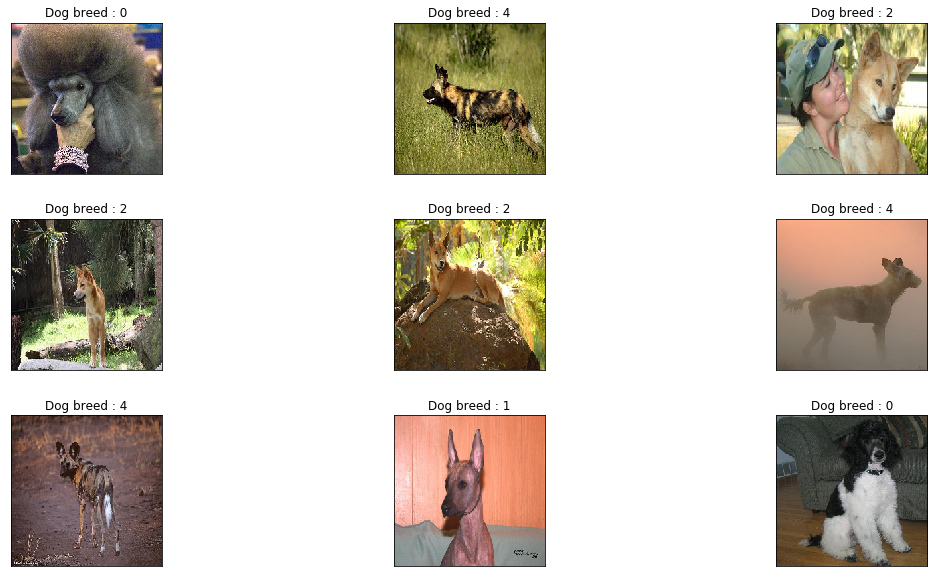

In [24]:
def display_rand_images(images, labels):
    plt.figure(1 , figsize = (19 , 10))
    n = 0 
    for i in range(9):
        n += 1 
        r = np.random.randint(0 , images.shape[0] , 1)
        
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        plt.imshow(images[r[0]])
        
        plt.title('Dog breed : {}'.format(labels[r[0]]))
        plt.xticks([])
        plt.yticks([])
        
    plt.show()
    
display_rand_images(images, labels)

In [25]:
#1-step in data shuffling

#get equally spaced numbers in a given range
n = np.arange(images.shape[0])
print("'n' values before shuffling = ",n)

#shuffle all the equally spaced values in list 'n'
np.random.seed(random_seed)
np.random.shuffle(n)
print("\n'n' values after shuffling = ",n)

'n' values before shuffling =  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238

In [26]:
#2-step in data shuffling

#shuffle images and corresponding labels data in both the lists
images = images[n]
labels = labels[n]

print("Images shape after shuffling = ",images.shape,"\nLabels shape after shuffling = ",labels.shape)

Images shape after shuffling =  (789, 227, 227, 3) 
Labels shape after shuffling =  (789,)


In [27]:
images = images.astype(np.float32)
labels = labels.astype(np.int32)
images = images/255
print("Images shape after normalization = ",images.shape)

Images shape after normalization =  (789, 227, 227, 3)


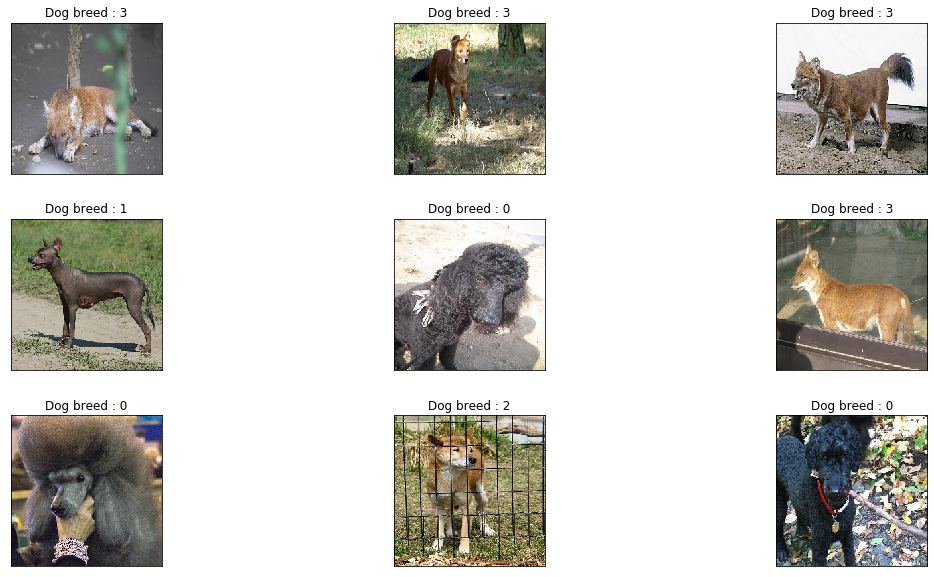

In [28]:
display_rand_images(images, labels)

In [29]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state = random_seed)

print("x_train shape = ",x_train.shape)
print("y_train shape = ",y_train.shape)
print("\nx_test shape = ",x_test.shape)
print("y_test shape = ",y_test.shape)

x_train shape =  (631, 227, 227, 3)
y_train shape =  (631,)

x_test shape =  (158, 227, 227, 3)
y_test shape =  (158,)


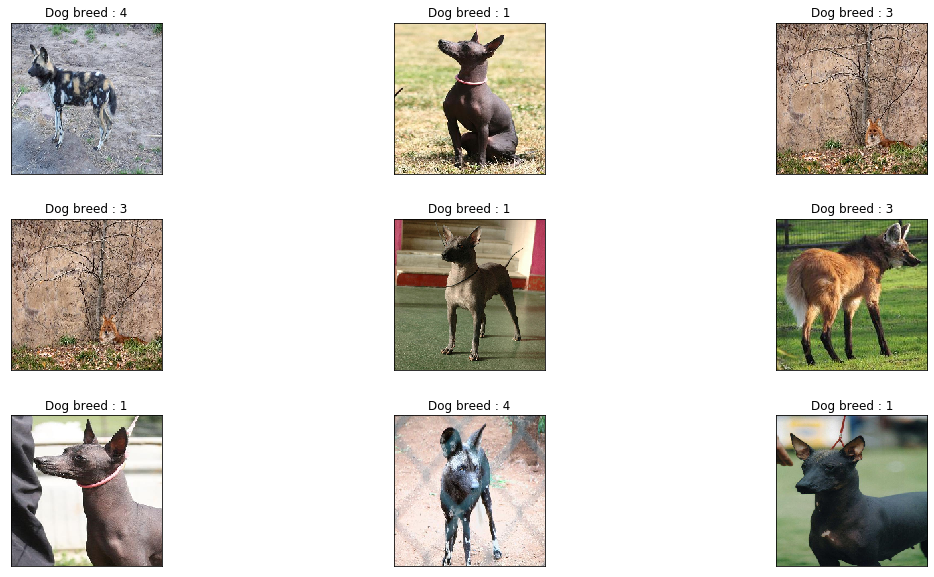

In [30]:
display_rand_images(x_train, y_train)

In [31]:
model=Sequential()

#1 conv layer
model.add(Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),padding="valid",activation="relu",input_shape=(227,227,3)))

#1 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

#2 conv layer
model.add(Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),padding="valid",activation="relu"))

#2 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

#3 conv layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#4 conv layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#5 conv layer
model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#3 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())


model.add(Flatten())

#1 dense layer
model.add(Dense(4096,input_shape=(227,227,3),activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#2 dense layer
model.add(Dense(4096,activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#3 dense layer
model.add(Dense(1000,activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#output layer
model.add(Dense(20,activation="softmax"))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 23, 23, 256)       614656    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 256)       0         
_________________________________________________________________
batch_normalization_2

In [32]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [33]:
%%time
model.fit(x_train, y_train, epochs=100)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
631/631 [==============================] - 55s 87ms/step - loss: 3.6145 - acc: 0.2013
Epoch 2/100
631/631 [==============================] - 51s 81ms/step - loss: 2.7084 - acc: 0.2900
Epoch 3/100
631/631 [==============================] - 51s 81ms/step - loss: 2.3349 - acc: 0.3645
Epoch 4/100
631/631 [==============================] - 51s 81ms/step - loss: 2.1593 - acc: 0.3582
Epoch 5/100
631/631 [==============================] - 52s 82ms/step - loss: 1.9082 - acc: 0.3914
Epoch 6/100
631/631 [==============================] - 52s 83ms/step - loss: 1.7769 - acc: 0.4231
Epoch 7/100
631/631 [==============================] - 52s 82ms/step - loss: 1.7746 - acc: 0.4152
Epoch 8/100
631/631 [==============================] - 52s 83ms/step - loss: 1.6662 - acc: 0.4326
Epoch 9/100
631/631 [==============================] - 52s 83ms/step - loss: 1.5038 - acc: 0.4564
Epoch 10/100
631/631 [==============================] - 51s 81ms/step 

631/631 [==============================] - 51s 81ms/step - loss: 0.0802 - acc: 0.9699
Epoch 81/100
631/631 [==============================] - 52s 82ms/step - loss: 0.0690 - acc: 0.9731
Epoch 82/100
631/631 [==============================] - 51s 81ms/step - loss: 0.0724 - acc: 0.9746
Epoch 83/100
631/631 [==============================] - 51s 81ms/step - loss: 0.0781 - acc: 0.9715
Epoch 84/100
631/631 [==============================] - 51s 81ms/step - loss: 0.0650 - acc: 0.9778
Epoch 85/100
631/631 [==============================] - 51s 81ms/step - loss: 0.0641 - acc: 0.9762
Epoch 86/100
631/631 [==============================] - 51s 81ms/step - loss: 0.0587 - acc: 0.9842
Epoch 87/100
631/631 [==============================] - 52s 82ms/step - loss: 0.0839 - acc: 0.9683
Epoch 88/100
631/631 [==============================] - 51s 81ms/step - loss: 0.0654 - acc: 0.9794
Epoch 89/100
631/631 [==============================] - 51s 82ms/step - loss: 0.0707 - acc: 0.9731
Epoch 90/100
631/631 [=

In [34]:
loss, accuracy = model.evaluate(x_test, y_test)

print(loss,accuracy)

158/158 [==============================] - 4s 25ms/step
2.7679828873163537 0.5063291131695614
